# Deciding University Admissions

In [1]:
import _plotting

import matplotlib.pyplot as plt
import pandas
import numpy
import sklearn.tree
numpy.random.seed(0)

## The dataset

In [2]:
def process_admissions(dataframe):

    column_admitted_chance = 'Chance of Admit'
    column_admitted = 'Admitted'
    columns_drop = [column_admitted_chance]

    dataframe_p = dataframe.copy()
    dataframe_p[column_admitted] = dataframe[column_admitted_chance] >= 0.75
    dataframe_p = dataframe_p.drop(columns = columns_drop)

    return dataframe_p

raw_admissions = pandas.read_csv('../Admission_Predict.csv', index_col=0)
data = process_admissions(raw_admissions)

features = data.drop(columns = ['Admitted'])
columns_features = features.columns
features = features.values

labels = data['Admitted'].values

## Training a decision trees

In [3]:
# Makes customizing and trying different models easier.
dict_params = {
    "all_simpler" : { "max_depth": 3, "min_samples_leaf" : 10, "min_samples_split" : 10 },
    "exams" :  { "max_depth": 2 }, # "min_samples_leaf" : 10, "min_samples_split" : 10 },
    "exams_simpler" : { "max_depth": 1 },
}

In [4]:
model_admissions = sklearn.tree.DecisionTreeClassifier()
model_admissions.fit(features, labels)
model_admissions.predict(features[0:5])
model_admissions.score(features, labels)

1.0

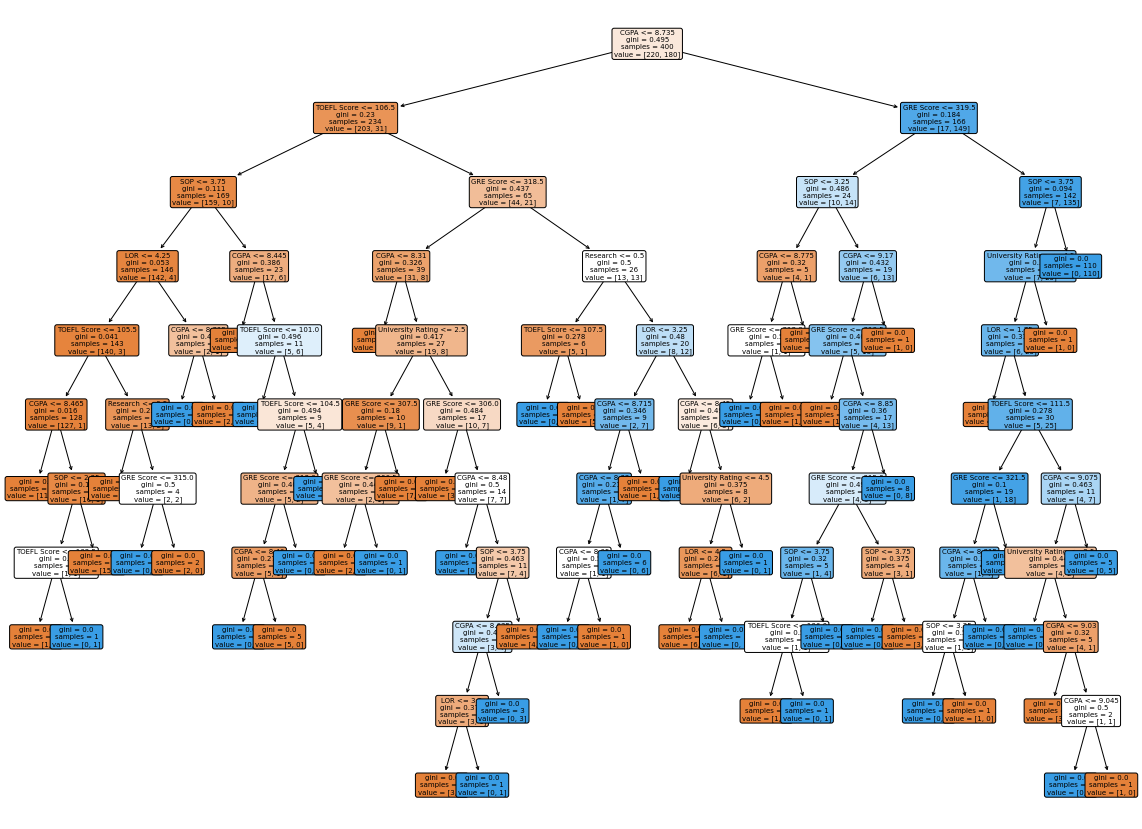

In [5]:
fig = plt.figure(figsize=(20,15))
sklearn.tree.plot_tree(model_admissions, feature_names=columns_features, filled=True, rounded=True, fontsize=7)
plt.show()

## Training a smaller tree that doesn't overfit

In [6]:
model_all_simpler = sklearn.tree.DecisionTreeClassifier(**dict_params["all_simpler"])
model_all_simpler.fit(features, labels)
model_all_simpler.score(features, labels)

0.885

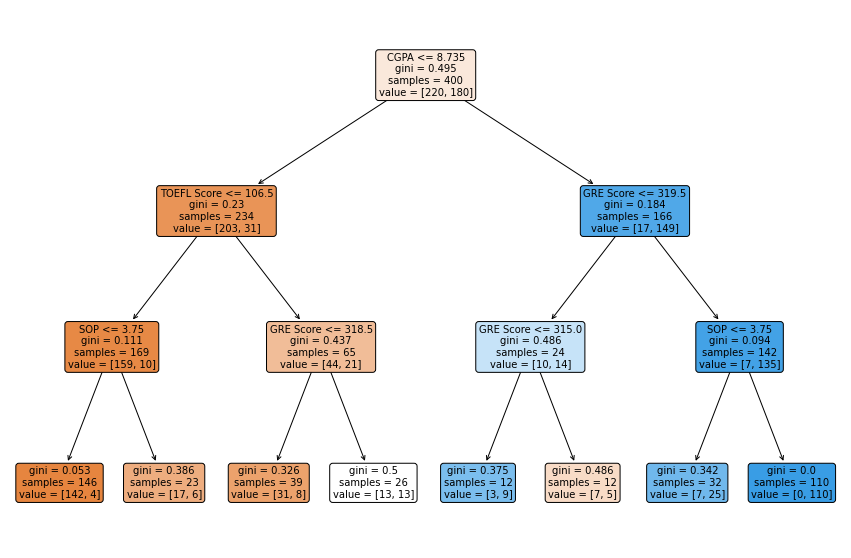

In [7]:
fig = plt.figure(figsize=(15,10))
sklearn.tree.plot_tree(model_all_simpler, feature_names=columns_features, filled=True, rounded=True, fontsize=10)
plt.show()

### Using the tree to make predictions

In [8]:
model_all_simpler.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.9,
                     0]])

array([ True])

In [9]:
# A node in the white (neutral) leaf gets a false prediction
model_all_simpler.predict([[320,
                     110,
                     3,
                     4.0,
                     3.5,
                     8.0,
                     0]])

array([False])

## Training a decision tree with only two features

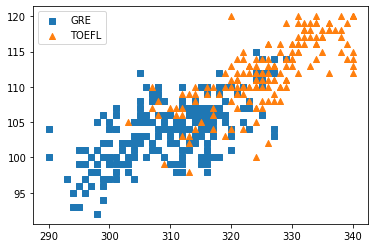

In [10]:
columns_exams = ['GRE Score', 'TOEFL Score']
# columns_exams = ['GRE Score', 'CGPA']

features_exams = data[columns_exams].values

# Plot the exam set
_plotting.plot_scatter(features_exams[labels == 0, 0], features_exams[labels == 0, 1], marker = 's')
_plotting.plot_scatter(features_exams[labels == 1, 0], features_exams[labels == 1, 1], marker = '^')
plt.legend(["GRE", "TOEFL"]) # not sure

## Fitting a tree of depth 2

In [11]:
model_admission_via_exams = sklearn.tree.DecisionTreeClassifier(**dict_params["exams"])
model_admission_via_exams.fit(features_exams, labels)

DecisionTreeClassifier(max_depth=2)

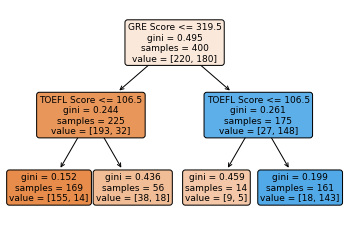

In [12]:
sklearn.tree.plot_tree(model_admission_via_exams, feature_names=columns_exams, filled=True, rounded=True, fontsize=9)
plt.show()

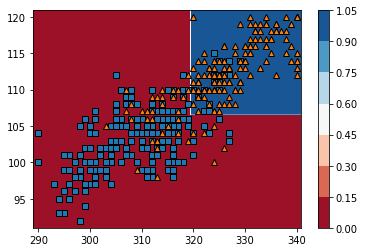

In [13]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams) # 25 size

## Fitting a tree of depth 1

In [14]:
model_admission_via_exams_simpler = sklearn.tree.DecisionTreeClassifier(**dict_params["exams_simpler"])
model_admission_via_exams_simpler.fit(features_exams, labels)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'GRE Score <= 319.5\ngini = 0.495\nsamples = 400\nvalue = [220, 180]'),
 Text(0.25, 0.25, 'gini = 0.244\nsamples = 225\nvalue = [193, 32]'),
 Text(0.75, 0.25, 'gini = 0.261\nsamples = 175\nvalue = [27, 148]')]

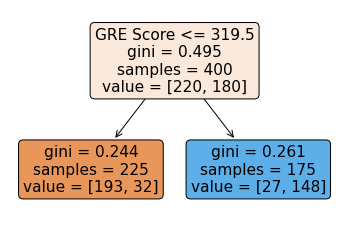

In [15]:
sklearn.tree.plot_tree(model_admission_via_exams_simpler, feature_names=columns_exams, filled=True, rounded=True)

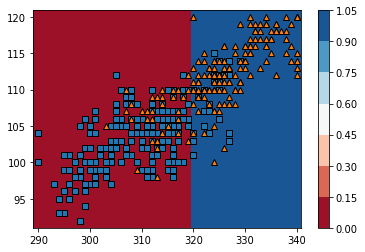

In [16]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams_simpler) # 25 size

## Fitting a tree of unbounded depth (overfitting)

In [17]:
model_admission_via_exams_crazy = sklearn.tree.DecisionTreeClassifier()
model_admission_via_exams_crazy.fit(features_exams, labels)

DecisionTreeClassifier()

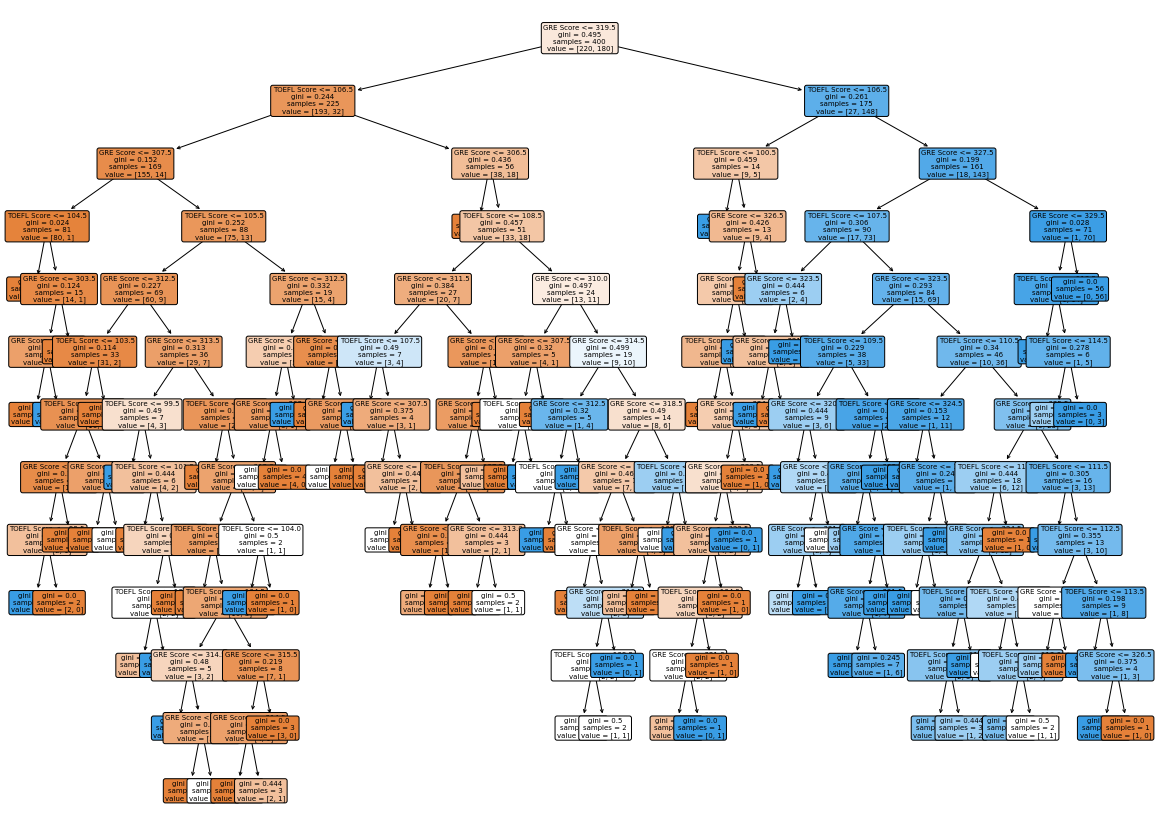

In [18]:
fig = plt.figure(figsize=(20,15))
sklearn.tree.plot_tree(model_admission_via_exams_crazy, feature_names=columns_exams, filled=True, rounded=True, fontsize=7)
plt.show()

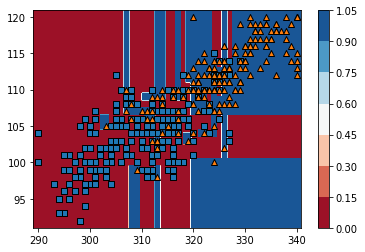

In [19]:
_plotting.plot_decision_boundary_2D(features_exams, labels, model_admission_via_exams_crazy) # 25 size